# Introduction

   Our team decided that we would find the most popular movies on Reddit between 2017-2019, and analyze the most-voted upon movies from Reddit’s r/movies polls in order to determine what makes a movie popular on Reddit. Through this analysis, we hope to create a profile of the ultimate Reddit movie. 


# Team Members and Responsibilities

Team Fitty-One

    Ahsan Bari - A13865703
        Co-wrote Project Proposal
        Helped Collect Data
        Gathered API’s and Initial Data Wrangling
        Co-wrote Background Research and Ethical Considerations
        Co-wrote Overview
        Co-wrote Conclusion and Discussion

    Eric Daetz - A12717246
        Co-wrote Overview
        Wrote Research Question
        Co-wrote Background
        Headed Spreadsheet/Data Collection
        Co-wrote Data Analysis

    David Chiu - A14855099
        Co-wrote Project Proposal
        Co-wrote Data Section
        Helped Spreadsheet/Data Collection
        Headed Data Cleaning

    Craig Schanz - A13573909
        Co-wrote, proofread, and edited Ethical Considerations
        Helped compile sheet of movie data for analysis
        Proofread and edited Overview
        Proofread and edited Research Question
        Co-wrote Conclusion and Discussion



# Research Question

What makes a movie popular on websites like Reddit? Specifically, what factors make a movie garner attention from users on the internet? We seek to analyze factors such as international gross, winning an Academy Award, what genre the movie is a part of, and other related factors. From this, can we predict what movie factors contribute the most to making a movie popular to discuss on Reddit, based on previous ranking information of the top movies currently there?


# Background Research

The movie industry in the last few years have produced more influential cultural changes than most other mediums in history. Movies create communities for people/fans to connect and relate to one another within their bubble. Movies like the Avengers series and the Harry Potter series, as well as nostalgic films being reproduced like The Incredibles, have gained a cult-like following. The fervent demand for movies has caused an increase in movie production within the last decade as well as an increase in the quality of the movies. In this analysis we are hoping to find factors within popular movies that are recurring in other successful films, and if this trend can be replicated to create a hypothetical film that will be as popular, if not more so, than the films that our prediction is based on. 

Since we are basing our data off of Reddit posts and comments, it is important to keep in mind the demographics of the average Reddit user. According to a Pew study done on Reddit users, about 67 percent of users are men. 22 percent of users are within ages 18-29, 34 percent are within the ages of 30-59, 25 percent of users are 50-64 and only 19 percent of users are over the age of 65. It is possible that this data is also skewed because it does not include users under the age of 18, but the site is Child Online Privacy & Protection Act(COPPA) compliant and requires all its users to be over the age of 13. Reddit reported in early 2017 that 54 percent of users are within the United States, the U.K is behind the U.S at 7.4 percent and Canada in third at 6.3 percent of users.  Although we aren’t specifically focusing on movie profitability, we found research on how various factors in a movie’s development and release impact profitability and decided to model some aspects of our experiment on the research conducted by Karl Wallström and Mark Wahlgren in 2018. For example, we kept the scope of our timeframe limited to only a few years, 2017-2019 (Wallström, Wahlgren, 5).

We also decided to analyze factors such as creative types, movie genre, MPAA age rating, whether or not a movie is a sequel, and the source material from which the movie was derived (Wallström, Wahlgren, 25). However, the conclusions drawn by Wallström and Wahlgren focused largely on the distribution methods of movies being profitable, and how both aforementioned factors and the power and scope of distributors of movies influences both how they are released (streaming vs movie theater distribution) and their profitability. For instance, they concluded that big budget movies by well-established studios do well with traditional theater releases, while smaller studios are better off releasing on streaming services. In contrast, we are analyzing the popularity of these movies and how these factors that can determine profitability can also determine popularity. Reddit consistently highlights what its users find popular/trending. In analyzing Reddit user’s feedback and input we can have a reliable metric to determine what is popular and what is not.

# Hypothesis

Considering the recent popularity of films like Avengers: Endgame and Captain Marvel we are predicting that movies in the ‘Action’ genre rated PG-13 will be the most successful in being ranked within the top 50 movies on the Reddit r/movies poll. The Marvel Cinematic Universe has significantly impacted the ways that movies are marketed and produced. The MCU created a demand for plot driven movies with significant plot lines that creates an emotional attachment between fans and the plot. 

# Data

We used a free sample of movie data given to us by OpusData (The Numbers API) which we combined with the results of our loop through the TMDB API. Both these APIs granted us free access to their data. The Numbers dataset contained about 2000 movies going up to 2018, and provided information on production budget, worldwide profit, genre (grouped into four broad categories), creative type, source and age rating. Many movies were not in the dataset, so we web-scraped the remaining movies manually off of The Numbers’ website. For the Reddit data, we used https://youpoll.me/list/4/ to list the top movies from Reddit’s r/movies poll of top movies, which began tallying since the beginning of 2017. This poll gave us the number of votes a movie had, as well as its mean rating based on those who voted. Finally, we consulted Wikipedia to determine if a movie was a sequel or if it had won an Academy Award, via web-scraping.

We began by setting a lower filter the data by limiting our samples to movies with 1000 votes or more. This wound up being the top 125 popular movies on Reddit. Unfortunately, because Netflix and some other movie distributors do not provide information such as gross (especially difficult to calculate for a service model in the vein of Netflix) and budget, we had to discard 24 movies in our initial data cleaning. Once the data was cleaned, we plotted our categorical variables: genre, creative type, age rating, and source. 


In [1]:
#Must setup the plotting tools to work properly
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

#Despite the FutureWarning, we like having tools that we are familiar with for this project

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Setup and Data Cleaning
df = pd.read_csv('Reddit_Movie108.csv')
df.dropna(inplace = True)
df

,movie_name,mean_rating,votes,genre,award_winning,total_gross,budget,age_rating,creative_type,source,production_method,prequel_sequel
0,Avengers: Endgame,8.73,89248,Action,0,2.728554e+09,356000000.0,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,1.0
1,Star Wars: The Last Jedi,6.82,71458,Action,0,1.316722e+09,317000000.0,PG-13,Science Fiction,Original Screenplay,Live Action,1.0
2,Avengers: Infinity War,8.75,51642,Action,0,2.048134e+09,300000000.0,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,1.0
3,Captain Marvel,6.79,17289,Action,0,1.122974e+09,175000000.0,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,0.0
4,Guardians of the Galaxy Vol. 2,7.90,15502,Action,0,8.623162e+08,200000000.0,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,1.0
5,A Quiet Place,8.24,14116,Horror,0,3.345223e+08,17000000.0,PG-13,Contemporary Fiction,Original Screenplay,Live Action,0.0
6,Blade Runner: 2049,8.82,13731,Drama,1,2.593574e+08,185000000.0,R,Science Fiction,Based on Fiction Book/Short Story,Live Action,1.0
7,Us,7.78,13479,Horror,0,2.542103e+08,20000000.0,R,Thriller/Suspense,Original Screenplay,Live Action,0.0
9,Hereditary,8.14,10985,Horror,0,7.013390e+07,10000000.0,R,Contemporary Fiction,Original Screenplay,Live Action,0.0
11,Dunkirk,8.54,10977,Drama,1,4.998374e+08,150000000.0,PG-13,Dramatization,Original Screenplay,Live Action,0.0


In [3]:
df.to_csv(path_or_buf='CuratedRedditData108.csv')

In [4]:
df = pd.read_csv('CuratedRedditData108.csv', index_col=0)
df.at[7, 'creative_type'] = 'Contemporary Fiction'
df.at[58, 'age_rating'] = 'PG'
df.at[70, 'age_rating'] = 'PG'
df.head(10)

,movie_name,mean_rating,votes,genre,award_winning,total_gross,budget,age_rating,creative_type,source,production_method,prequel_sequel
0,Avengers: Endgame,8.73,89248.0,Action,0.0,2.728554e+09,356000000.0,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,1.0
1,Star Wars: The Last Jedi,6.82,71458.0,Action,0.0,1.316722e+09,317000000.0,PG-13,Science Fiction,Original Screenplay,Live Action,1.0
2,Avengers: Infinity War,8.75,51642.0,Action,0.0,2.048134e+09,300000000.0,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,1.0
3,Captain Marvel,6.79,17289.0,Action,0.0,1.122974e+09,175000000.0,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,0.0
4,Guardians of the Galaxy Vol. 2,7.90,15502.0,Action,0.0,8.623162e+08,200000000.0,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,1.0
5,A Quiet Place,8.24,14116.0,Horror,0.0,3.345223e+08,17000000.0,PG-13,Contemporary Fiction,Original Screenplay,Live Action,0.0
6,Blade Runner: 2049,8.82,13731.0,Drama,1.0,2.593574e+08,185000000.0,R,Science Fiction,Based on Fiction Book/Short Story,Live Action,1.0
7,Us,7.78,13479.0,Horror,0.0,2.542103e+08,20000000.0,R,Contemporary Fiction,Original Screenplay,Live Action,0.0
9,Hereditary,8.14,10985.0,Horror,0.0,7.013390e+07,10000000.0,R,Contemporary Fiction,Original Screenplay,Live Action,0.0
11,Dunkirk,8.54,10977.0,Drama,1.0,4.998374e+08,150000000.0,PG-13,Dramatization,Original Screenplay,Live Action,0.0


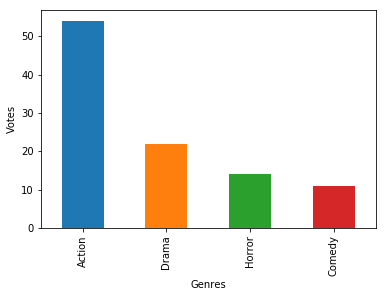

In [5]:
#Votes vs genres
(df["genre"].value_counts()).plot(kind = "bar")
plt.ylabel('Votes')
plt.xlabel('Genres')

f1 = plt.gcf()

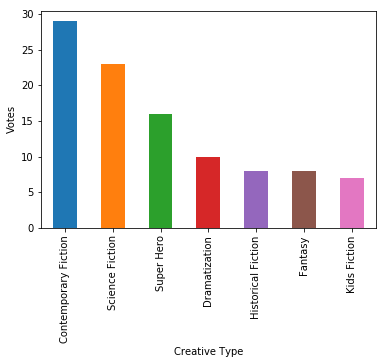

In [6]:
#Votes vs creative types
(df["creative_type"].value_counts()).plot(kind = "bar")

plt.ylabel('Votes')
plt.xlabel('Creative Type')
f2 = plt.gcf()

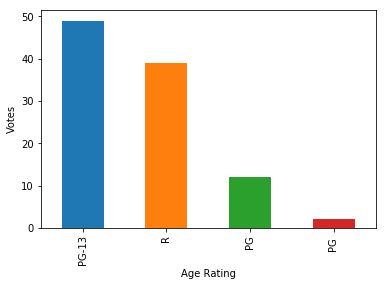

In [7]:
#Votes v. Age Rating
(df["age_rating"].value_counts()).plot(kind = "bar")
plt.ylabel('Votes')
plt.xlabel('Age Rating')

f3 = plt.gcf()

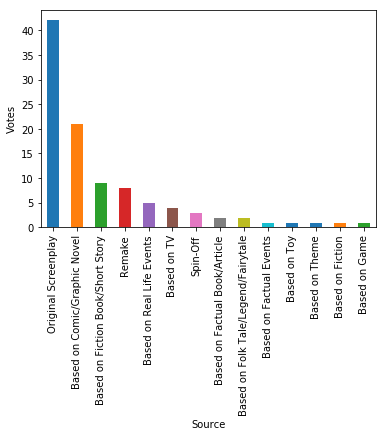

In [8]:
#Votes v. Source
(df["source"].value_counts()).plot(kind = "bar")
plt.ylabel('Votes')
plt.xlabel('Source')

f4 = plt.gcf()

We immediately noticed that in our bar graphs, both creative type and source had a large number of subcategories, but were overall dominated by 2 or 3. We decided to cut many of these subcategories in order to reduce the number of both potential outliers and variables for data analysis, only keeping as many as would fit into the first ¾ of the entries in any category. This resulted in us keeping all genre and age rating subcategories, but only the first 4 subcategories in creative type and source. After cleaning the dataset according, we turned our remaining categorical variables into a set of dummy variables, replacing each categorical column with 3 or 4 “boolean” columns. We were then able to perform correlation and regression analysis.

In [9]:
df.to_csv('RedditMovie108.csv')

In [10]:
df_d = df

In [11]:
#Make adjustments to curate data
df_d = df_d.loc[(df_d['source'] == 'Original Screenplay') | (df_d['source'] == 'Based on Fiction Book/Short Story') | 
                (df_d['source'] == 'Remake') | (df_d['source'] == 'Based on Comic/Graphic Novel')]

df_d = df_d.loc[(df_d['creative_type'] == 'Super Hero') | (df_d['creative_type'] == 'Science Fiction') | 
                 (df_d['creative_type'] == 'Contemporary Fiction') | (df_d['creative_type'] == 'Dramatization')]
df_d

,movie_name,mean_rating,votes,genre,award_winning,total_gross,budget,age_rating,creative_type,source,production_method,prequel_sequel
0,Avengers: Endgame,8.73,89248.0,Action,0.0,2.728554e+09,356000000.0,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,1.0
1,Star Wars: The Last Jedi,6.82,71458.0,Action,0.0,1.316722e+09,317000000.0,PG-13,Science Fiction,Original Screenplay,Live Action,1.0
2,Avengers: Infinity War,8.75,51642.0,Action,0.0,2.048134e+09,300000000.0,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,1.0
3,Captain Marvel,6.79,17289.0,Action,0.0,1.122974e+09,175000000.0,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,0.0
4,Guardians of the Galaxy Vol. 2,7.90,15502.0,Action,0.0,8.623162e+08,200000000.0,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,1.0
5,A Quiet Place,8.24,14116.0,Horror,0.0,3.345223e+08,17000000.0,PG-13,Contemporary Fiction,Original Screenplay,Live Action,0.0
6,Blade Runner: 2049,8.82,13731.0,Drama,1.0,2.593574e+08,185000000.0,R,Science Fiction,Based on Fiction Book/Short Story,Live Action,1.0
7,Us,7.78,13479.0,Horror,0.0,2.542103e+08,20000000.0,R,Contemporary Fiction,Original Screenplay,Live Action,0.0
9,Hereditary,8.14,10985.0,Horror,0.0,7.013390e+07,10000000.0,R,Contemporary Fiction,Original Screenplay,Live Action,0.0
11,Dunkirk,8.54,10977.0,Drama,1.0,4.998374e+08,150000000.0,PG-13,Dramatization,Original Screenplay,Live Action,0.0


In [12]:
df_d.to_csv(path_or_buf= 'CleanedRedditData108.csv')

In [13]:
new_df = df_d
new_df

,movie_name,mean_rating,votes,genre,award_winning,total_gross,budget,age_rating,creative_type,source,production_method,prequel_sequel
0,Avengers: Endgame,8.73,89248.0,Action,0.0,2.728554e+09,356000000.0,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,1.0
1,Star Wars: The Last Jedi,6.82,71458.0,Action,0.0,1.316722e+09,317000000.0,PG-13,Science Fiction,Original Screenplay,Live Action,1.0
2,Avengers: Infinity War,8.75,51642.0,Action,0.0,2.048134e+09,300000000.0,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,1.0
3,Captain Marvel,6.79,17289.0,Action,0.0,1.122974e+09,175000000.0,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,0.0
4,Guardians of the Galaxy Vol. 2,7.90,15502.0,Action,0.0,8.623162e+08,200000000.0,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,1.0
5,A Quiet Place,8.24,14116.0,Horror,0.0,3.345223e+08,17000000.0,PG-13,Contemporary Fiction,Original Screenplay,Live Action,0.0
6,Blade Runner: 2049,8.82,13731.0,Drama,1.0,2.593574e+08,185000000.0,R,Science Fiction,Based on Fiction Book/Short Story,Live Action,1.0
7,Us,7.78,13479.0,Horror,0.0,2.542103e+08,20000000.0,R,Contemporary Fiction,Original Screenplay,Live Action,0.0
9,Hereditary,8.14,10985.0,Horror,0.0,7.013390e+07,10000000.0,R,Contemporary Fiction,Original Screenplay,Live Action,0.0
11,Dunkirk,8.54,10977.0,Drama,1.0,4.998374e+08,150000000.0,PG-13,Dramatization,Original Screenplay,Live Action,0.0


In [14]:
def separate_g1(take):
    if take == 'Action':
        return 1.0
    else:
        return 0.0

def separate_g2(take):
    if take == 'Horror':
        return 1.0
    else:
        return 0.0
    
def separate_g3(take):
    if take == 'Drama':
        return 1.0
    else:
        return 0.0

def separate_g4(take):
    if take == 'Comedy':
        return 1.0
    else:
        return 0.0

def separate_c1(take):
    if take == 'Super Hero':
        return 1.0
    else:
        return 0.0
    
def separate_c2(take):
    if take == 'Science Fiction':
        return 1.0
    else:
        return 0.0
    
def separate_c3(take):
    if take == 'Contemporary Fiction':
        return 1.0
    else:
        return 0.0
    
def separate_c4(take):
    if take == 'Dramatization':
        return 1.0
    else:
        return 0.0

def separate_s1(take):
    if take == 'Original Screenplay':
        return 1.0
    else:
        return 0.0
    
def separate_s2(take):
    if take == 'Based on Fiction Book/Short Story':
        return 1.0
    else:
        return 0.0
    
def separate_s3(take):
    if take == 'Based on Comic/Graphic Novel':
        return 1.0
    else:
        return 0.0
    
def separate_s4(take):
    if take == 'Remake':
        return 1.0
    else:
        return 0.0
    
def separate_p1(take):
    if take == 'R':
        return 1.0
    else:
        return 0.0
    
def separate_p2(take):
    if take == 'PG-13':
        return 1.0
    else:
        return 0.0
    
def separate_p3(take):
    if take == 'PG':
        return 1.0
    else:
        return 0.0

In [15]:
new_df['action'] = new_df['genre'].apply(separate_g1)
new_df['horror'] = new_df['genre'].apply(separate_g2)
new_df['drama'] = new_df['genre'].apply(separate_g3)
new_df['comedy'] = new_df['genre'].apply(separate_g4)
new_df['super_hero'] = new_df['creative_type'].apply(separate_c1)
new_df['science_fiction'] = new_df['creative_type'].apply(separate_c2)
new_df['contemporary_fiction'] = new_df['creative_type'].apply(separate_c3)
new_df['dramatization'] = new_df['creative_type'].apply(separate_c4)
new_df['original_screenplay'] = new_df['source'].apply(separate_s1)
new_df['book_story'] = new_df['source'].apply(separate_s2)
new_df['comic'] = new_df['source'].apply(separate_s3)
new_df['remake'] = new_df['source'].apply(separate_s4)
new_df['r'] = new_df['age_rating'].apply(separate_p1)
new_df['pg13'] = new_df['age_rating'].apply(separate_p2)
new_df['pg'] = new_df['age_rating'].apply(separate_p3)
new_df = new_df.drop(labels = ['genre', 'age_rating', 'source', 'creative_type'], axis = 1)

In [16]:
new_df.corr()

,mean_rating,votes,award_winning,total_gross,budget,prequel_sequel,action,horror,drama,comedy,...,science_fiction,contemporary_fiction,dramatization,original_screenplay,book_story,comic,remake,r,pg13,pg
mean_rating,1.000000,0.260168,0.361322,0.197942,-0.071221,0.031664,-0.162515,0.000213,0.265700,-0.078520,...,-0.417686,0.159456,0.153018,0.019497,-0.209858,0.138008,-0.015984,0.105551,-0.177786,0.208960
votes,0.260168,1.000000,0.001814,0.754198,0.565824,0.284682,0.193253,-0.045232,-0.105239,-0.130576,...,-0.019554,-0.245373,-0.015857,-0.153378,-0.064207,0.249628,-0.077004,-0.208955,0.217801,-0.028909
award_winning,0.361322,0.001814,1.000000,0.045503,0.027865,-0.119918,-0.137972,-0.146528,0.394853,-0.103448,...,-0.101195,-0.057664,0.250324,-0.127563,0.040522,0.025666,0.182282,0.040522,-0.127563,0.250324
total_gross,0.197942,0.754198,0.045503,1.000000,0.746782,0.369107,0.497154,-0.265424,-0.216108,-0.216122,...,-0.144045,-0.375083,0.000737,-0.389312,-0.075372,0.512628,-0.071002,-0.476083,0.480739,-0.021408
budget,-0.071221,0.565824,0.027865,0.746782,1.000000,0.321737,0.650062,-0.370644,-0.282924,-0.251603,...,0.113902,-0.598199,0.025032,-0.465390,-0.049908,0.576415,-0.069108,-0.593126,0.601397,-0.033759
prequel_sequel,0.031664,0.284682,-0.119918,0.369107,0.321737,1.000000,0.328366,-0.155323,-0.094821,-0.232781,...,0.079846,-0.085348,-0.129989,0.020601,-0.074605,0.033752,-0.004864,-0.107762,0.152449,-0.129989
action,-0.162515,0.193253,-0.137972,0.497154,0.650062,0.328366,1.000000,-0.500488,-0.527745,-0.353343,...,0.071951,-0.430004,-0.197312,-0.477643,-0.035591,0.591474,-0.095132,-0.525955,0.528749,-0.016912
horror,0.000213,-0.045232,-0.146528,-0.265424,-0.370644,-0.155323,-0.500488,1.000000,-0.218850,-0.146528,...,0.050261,0.197861,-0.081823,0.261949,-0.046961,-0.296025,0.094908,0.433085,-0.402001,-0.081823
drama,0.265700,-0.105239,0.394853,-0.216108,-0.282924,-0.094821,-0.527745,-0.218850,1.000000,-0.154508,...,-0.151142,0.238113,0.373878,0.210580,0.060523,-0.312147,0.082859,0.141220,-0.190525,0.143799
comedy,-0.078520,-0.130576,-0.103448,-0.216122,-0.251603,-0.232781,-0.353343,-0.146528,-0.154508,1.000000,...,0.014456,0.159425,-0.057767,0.194701,0.040522,-0.208993,-0.071328,0.148581,-0.127563,-0.057767


In [17]:
new_df.to_csv('SuperCategories108.csv')
df_cd = new_df

In [18]:
#Methodsfor linear regression taken from Lecture Notes 11_regression_.ipynb and Assignment 4
outcome, predictors = patsy.dmatrices('votes ~ action + drama + horror + comedy + award_winning + mean_rating + total_gross + budget + prequel_sequel + science_fiction + contemporary_fiction + dramatization + original_screenplay + book_story + comic + remake + pg13 + r + pg ', df_cd)
mod1 = sm.OLS(outcome, predictors)
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                  votes   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     6.951
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           9.12e-08
Time:                        22:45:38   Log-Likelihood:                -666.76
No. Observations:                  64   AIC:                             1368.
Df Residuals:                      47   BIC:                             1404.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.448e+04 

In [19]:
#Methods for linear regression taken from Lecture Notes 11_regression_.ipynb and Assignment 4
outcome2, predictors2 = patsy.dmatrices('votes ~ action + total_gross', df_cd)
mod2 = sm.OLS(outcome2, predictors2)
res2 = mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                  votes   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     48.24
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           2.73e-13
Time:                        22:45:41   Log-Likelihood:                -675.25
No. Observations:                  64   AIC:                             1357.
Df Residuals:                      61   BIC:                             1363.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     697.6630   1814.681      0.384      

In [20]:
#Let's check the mean of the Action movies' votes
df_act = df_cd.loc[(df_cd['action'] == 1.0)]
print(df_act['votes'].mean())
print(df_act['votes'].max())
print(df_act['votes'].min())

10728.7428571
89248.0
1030.0


In [21]:
#Let's try and remove some possibly colinear factors and see what's going on
outcome3, predictors3 = patsy.dmatrices('votes ~ action + drama + comedy + award_winning + total_gross + budget + prequel_sequel + contemporary_fiction + dramatization + original_screenplay + book_story + comic + remake + pg13 + r + pg ', df_cd)
mod3 = sm.OLS(outcome3, predictors3)
res3 = mod3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                  votes   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     7.240
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           8.21e-08
Time:                        22:45:49   Log-Likelihood:                -669.72
No. Observations:                  64   AIC:                             1369.
Df Residuals:                      49   BIC:                             1402.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -44.6797 

# Data Analysis

Based on our correlation table, the factor that most contributes to a movie’s popularity on Reddit is the total gross, with a strong positive coefficient of .754. The next highest contributing factor was budget, with a coefficient of .566. Neither of these observations were particularly surprising -- a big-budget blockbuster is likely to sell a lot of tickets, and a high gross revenue means many people watched the movie and could thus talk about it. Besides these factors, the data suggested many smaller factors that also contribute to a movie’s popularity. Out of them, the only non-categorical factor was mean rating, with a coefficient of .260. Action movies, PG-13 movies, movies that are either prequels or sequels, and superhero movies all appear to correlate more strongly with popularity than others in their respective categories, presented in order of ascending coefficient magnitude. Even though their coefficients are relatively weak (between .193 and .314, respectively) they are the only positive coefficients in their respective category, suggesting statistical significance. In contrast, comedy movies, original screenplays, R-rated movies and contemporary fiction movies appear to perform the worst in their respective categories, but only weakly: their coefficients ranged from -.131 to -.245, again in ascending order of magnitude. However, it’s worth noting that many of the worst-performing category members, such as Original Screenplay in our “source” category, are both oversaturated in terms of representation, which would skew the coefficient of movies within that category negatively. 

Since the mean of action is just 10,728 when the max is 89,248, we know that action must be skewed negatively. This is most likely why it appears to have a negative impact on a movie's popularity standing to be an action movie. In fact, all genres seem skewed negatively, probably for similar reasons. We also  know that total gross having an impact on the popularity of a movie is almost certain because of its low p-value when linear regression is applied, but naturally, because the number of votes on Reddit pale in comparison to the gross of the movies, the positive contribution seems extremely small in comparison to each unit of gross. The distribution of movie genres among the top 125 Reddit movies (101 after applying initial data cleaning) was pretty uneven. Because a lot of the data appears to be collinear, as evidenced by the numerous warnings given by the OLS function when attempting to apply multivariate linear regression, it seems that linear regression in our case is not the best measure for determining a relationship between our independent variables and the number of votes (our dependent variable). As a result, we believe it is helpful to look at the number of top 101 popular movies on Reddit and measure the popularity of categories against each other. For instance, when looking at our bar graphs, it is readily apparent that Contemporary Fiction is a popular category, leading to the aforementioned overrepresentation in our distribution of popular movies. 


# Conclusion and Discussion


Based on our data analysis above, the two largest factors that appear to contribute to a movie’s popularity on Reddit forums are total gross and budget, which is shown by their strong correlational values of .754 and .566, respectively. We believe that this is due to the fact that, as gross worldwide income increases, the amount of people watching that movie must increase as well as this is indicative of higher amounts of ticket sales. Additionally, as technology and social media have grown, so has the global discussion of blockbuster movies and television shows. As this conversation grows it brings people from all walks of life together, whether they have consumed the media or not. The fear of missing out, especially on these high-profile movies, has drastically increased the amount a movie grosses. Less evidently, budget also has a significant positive contribution to a movie’s popularity as its value increases. We believe that this is due to the fact that a sizable portion of a high-production value movie’s budget is directed towards marketing and advertising. Smaller companies do not necessarily have the luxury of spending additional money on advertising on popular platforms such as TV commercials and YouTube ads on top of what is necessary to actually produce the film itself. Being able to advertise in a widespread manner is necessary to have large amounts of people have knowledge of the movie and therefore want to go see it. Besides these factors that contribute to movie popularity as a whole, the most significant genre-specific correlation that we found was that of superhero movies, with a correlational value of .314. This seems to indicate that if a movie falls under this genre, it is much more likely to succeed than movies in other genres. Considering that the two biggest companies in the superhero movie industry are Marvel and DC, with Marvel producing superhero movies on a more consistent basis, this correlation indicates the influence that these companies have had on the genre as a whole.

In contrast, we found that there were some aspects that have negative correlational values, which indicate that movies having these qualities are less likely to be featured in top ranked movies on Reddit. Namely, R-rated movies and contemporary fiction movies are the two categories with the strongest negative correlational values, in the range of -.131 and -.245. We believe that the reasons that these have the strongest negative correlations are twofold. First, with regard to R-rated movies, the fact that it is R-rated restricts the demographic of those that are able to watch those movies to people that the movie industry considers adults. The fact that PG-13 movies - ones that are much less restrictive and also target a demographic that arguably has more free time on average than adults - have a positive correlation of about .20 further supports this conclusion. Secondly, contemporary fiction movies also seem to have a more niche demographic than movies of other genres. Coupling this with the fact that, of the movies we analyzed, contemporary fiction movies also tend to have an R-rating further restricts the base of potential viewers of such movies.

So, to have the best chance at producing a movie that consistently lands in the top rated spots on Reddit, the movie should be an Action movie in the creative type, Superhero, be rated PG-13, and should have a significant budget in order to market their movie effectively.

We made use of custom Python libraries to create DataFrames and workable CSVs, namely tmdbsimple by Celia Oakley. Additionally we used Karl Wallstrom and Markus Wahlgren’s analysis on ‘What are the main factors affecting movie profitability?’ to lay the groundwork for how to proceed with our analysis. 

Initially in our dataset we had 126 movies; of those, only 101 did not contain ‘NaN’ entries. The 25 movies that included NaN entries were all created and produced by Netflix. We felt it necessary to enter empty cells as ‘NaN’ as opposed to  ‘0’, because empty cells do not necessarily mean that no budget or gross was generated, only possibly that Netflix and/or the movie’s producers have a nondisclosure agreement. If we had entered these values as ‘0’ and failed to drop them, this would have drastically skewed our subsequent analyses and conclusions. Furthermore, the predictions we are trying to make are based on the assumption that the movies being produced are being released in theaters, and only being released to other platforms afterwards. Netflix originals do not undergo this traditional process, and therefore we did not include them in the analysis.


# Ethical Considerations

 There were times where we had to modify the genre label for a movie from our primary sources due to the fact that genre classifications have variations between organizations, such as between IMDb and Wikipedia. Additionally, we had to condense instances of multiple subgenres into a single genre. When doing so, we ensured that we collapsed subgenres into existing genre categories (such as Thrillers being collapsed into the Horror genre). We realize that this may be an invalid operation for entire subgenres at times, and the choice to do so is inherently subjective and thereby subject to bias. For instance, we made the decision to collapse Black Comedy into Comedy rather than Horror, even though some movies categorized as Black Comedy may have had a simple majority of Horror aspects rather than Comedy aspects. Furthermore, there were a few cases where we manually collapsed Thriller movies (i.e. BlacKkKlansman) into the Drama category, which could further skew results. Even so, this decision was made because it would be more damaging to our possible inferences to have too many genres to draw linear regressions from, and having too many linear regression models could inflate Type I errors (where we find significant effects where there aren’t any).
 
Our dataset is likely biased against small, indie films because the data is mostly derived from Reddit comments and posts. Being a form of social media, Reddit’s top 50 lists mostly include large-scale production movies. As a result of using Reddit as our main source of data, it is likely that small-production films and indie movies are not mentioned in our data because those movies lack the marketing budget of large-scale movies, which directly impacts worldwide box office revenue. The Reddit user base may also create a bias for certain types of movies being preferred over other. The average Reddit user is male and between the ages of 24-39. The preferences of the average Reddit user may be significantly different from observed demographics of the movies being analyzed. This becomes noticeable when the “Action” genre makes up slightly over half of our analyzable data (54 entries out of 101). This could also be suggestive of bias regarding the volume of action movies produced in recent years versus other genres like Drama or Comedy. As a result of this possibility for bias permeating our dataset, our findings are only being privately published for the purposes of the class project and will not be publicly published. Furthermore, we shall only generalize our findings to predicting what threshold of certain facets must be reached for a hypothetical movie to make the Reddit r/movie’s top 50 list. 

The spirit of this project could, in future analysis, be further generalized to movie production in the whole of America. Privately publishing the project for the purposes of the class project - as well as ensuring that only the professor, the professor’s affiliates, and data analysts that were directly involved with the making of the project have access to the project - reduces the risk of unintended use of our data and analyses as much as possible.
We are confident that the APIs and the poll we used do not have any personally identifiable information (PII), due to the fact that the data listed are of movies as a whole and do not list the specific names or other PII of anyone involved in the movies' production.
